 # Introduction to TensorFlow
 
  This lesson is adapted from
 
 
1. TensorFlow Tutorial -**from Kulbear** 
https://github.com/Kulbear/deep-learning-coursera/blob/master/Improving%20Deep%20Neural%20Networks%20Hyperparameter%20tuning%2C%20Regularization%20and%20Optimization/Tensorflow%20Tutorial.ipynb

2. Python TensorFlow Tutorial – Build a Neural Network **from Andy**
http://adventuresinmachinelearning.com/python-tensorflow-tutorial/


which are licensed under the [MIT license](https://opensource.org/licenses/MIT)   

![TensorFlow](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/TensorFlow.png)


 TensorFlow is an open source software library for numerical computation using data flow graphs. The graph nodes represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) that flow between them. This flexible architecture enables you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device without rewriting code. TensorFlow also includes TensorBoard, a data visualization toolkit.

TensorFlow was originally developed by researchers and engineers working on the Google Brain team within Google's Machine Intelligence Research organization for the purposes of conducting machine learning and deep neural networks research. The system is general enough to be applicable in a wide variety of other domains, as well.


### TODO  What is a Tensor?

For blog credit - TODO  What is a Tensor?



* In simple terms, TensorFlow is based on graph based computation which means it’s an alternative way of conceptualising mathematical calculations.  Consider the following expression a=(b+c)∗(c+2).  We can break this function down into the following components: 

### d = b + c 

### e = c + 2

### a = d * e

which can be represented graphically as:

![Computatonal Graph](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/Computatonal_Graph.png)

This may seem like a silly example – but notice a powerful idea in expressing the equation this way: two of the computations (d=b+c and e = c+2) can be performed in parallel.  By splitting up these calculations across CPUs or GPUs, this can give us significant gains in computational times.  These gains are a must for big data applications and deep learning – especially for complicated neural network architectures such as Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs).  The idea behind TensorFlow is to ability to create these computational graphs in code and allow significant performance improvements via parallel operations and other efficiency gains.


# TensorFlow data flow graph

In [ ]:
![TensorFlow data flow graph gif](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/TensorFlow-data-flow-graph.gif)

#### The TensorFlow graph above, which shows the computational graph of a three-layer neural network.The animated data flows between different nodes in the graph are tensors which are multi-dimensional data arrays.  For instance, the input data tensor may be 5000 x 64 x 1, which represents a 64 node input layer with 5000 training samples.  After the input layer there is a hidden layer with rectified linear units as the activation function.  There is a final output layer (called a “logit layer” in the above graph) which uses cross entropy as a cost/loss function.  At each point we see the relevant tensors flowing to the “Gradients” block which finally flow to the Stochastic Gradient Descent optimiser which performs the back-propagation and gradient descent.

## Really Awesome TensorFlow Tutorials


TensorFlow 101 (Really Awesome Intro Into TensorFlow) [https://youtu.be/arl8O22aa6I](https://youtu.be/arl8O22aa6I)    


Getting Started with TensorFlow and Deep Learning | SciPy 2018 Tutorial ... [https://youtu.be/tYYVSEHq-io](https://youtu.be/tYYVSEHq-io)   


Hands-on TensorBoard (TensorFlow Dev Summit 2017) [https://youtu.be/eBbEDRsCmv4](https://youtu.be/eBbEDRsCmv4) 

# Installation

See https://www.tensorflow.org/install/ for instructions on how to install our release binaries or how to build from source.

People who are a little more adventurous can also try nightly binaries:

#### Nightly pip packages

* TensorFlow now offers nightly pip packages under the tf-nightly and tf-nightly-gpu project on pypi. Simply run **pip install tf-nightly** or **pip install tf-nightly-gpu** in a clean environment to install the nightly TensorFlow build. We support CPU and GPU packages on Linux, Mac, and Windows.


#### Individual whl files

1. Linux CPU-only: Python 2 (build history) / Python 3.4 (build history) / Python 3.5 (build history) / Python 3.6 (build history)
2. Linux GPU: Python 2 (build history) / Python 3.4 (build history) / Python 3.5 (build history) / Python 3.6 (build history)
3. Mac CPU-only: Python 2 (build history) / Python 3 (build history)
4. Windows CPU-only: Python 3.5 64-bit (build history) / Python 3.6 64-bit (build history)
5. Windows GPU: Python 3.5 64-bit (build history) / Python 3.6 64-bit (build history)
6. Android: demo APK, native libs (build history)

In [ ]:
!pip install tensorflow

### 1. A Simple TensorFlow example

Let make TensorFlow perform a simple calculation – a =(b+c)∗(c+2). But before that lets introduce ourselves to TensorFlow variables and constants.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf #importing library
import numpy as np

# first, create a TensorFlow constant
const = tf.constant(2.0, name="const") 
    
# create TensorFlow variables
b = tf.Variable(2.0, name='b')
c = tf.Variable(1.0, name='c')

TensorFlow constants can be declared using tf.constant function, and variables with the tf.Variable function.  The first element in both is the value to be assigned the constant / variable when it is initialised.  The second is an optional name string which can be used to label the constant / variable – this is handy for when we want to do visualisations (will be discussed  later).  TensorFlow will infer the type of the constant / variable from the initialised value, but it can also be set explicitly using the optional dtype argument.  TensorFlow has many of its own types like tf.float32, tf.int32 etc. – see https://www.tensorflow.org/api_docs/python/tf/DType.


As the Python code runs through these commands, the variables haven’t actually been declared as they would have been if you just had a standard Python declaration (i.e. b = 2.0).  Instead, all the constants, variables, operations and the computational graph are only created when the initialisation commands are run.

* Creating TensorFlow operations:

In [ ]:
# creating some operations
d = tf.add(b, c, name='d')
e = tf.add(c, const, name='e')
a = tf.multiply(d, e, name='a')

THe operations above are obvious and they instantiate the operations  b + c,  c + 2.0 and  d∗e.

=>> setup an object to initialise the variables and the graph structure:

In [ ]:
# setup the variable initialisation
init_op = tf.global_variables_initializer()

To run the operations between the variables, we need to start a TensorFlow session – tf.Session.  The TensorFlow session is an object where all operations are run.  Using the with Python syntax, we can run the graph with the following code:

In [ ]:
# start of the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
    # compute the output of the graph
    a_out = sess.run(a)
    print("Variable a is {}".format(a_out))

Variable a is 9.0


The first command within the with block is the initialisation, which is run with the, well, run command.  Next we want to figure out what the variable a should be.  All we have to do is run the operation which calculates a i.e. a = tf.multiply(d, e, name=’a’).  Note that a is an operation, not a variable and therefore it can be run.  We do just that with the sess.run(a) command and assign the output to a_out, the value of which we then print out.

**Writing and running programs in TensorFlow has the following steps:**

1. Create Tensors (variables) that are not yet executed/evaluated.
2. Write operations between those Tensors.
3. Initialize your Tensors.
4. Create a Session.
5. Run the Session. This will run the operations you'd written above.

### Let's take an another easy example. Run the cell below:


In [ ]:
a = tf.constant(500)
b = tf.constant(2)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


The expected output was 1000 but we got a tensor saying that the result is a tensor that does not have the shape attribute, and is of type "int32". All we did was put in the 'computation graph', but didn't run this computation yet. In order to actually multiply the two numbers, we will have to create a session and run it.

In [ ]:
sess = tf.Session()
print(sess.run(c))

1000


**Lets take another example where we compute the loss of one training example.**

In [ ]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

9


Therefore, when we created a variable for the loss, we simply defined the loss as a function of other quantities, but did not evaluate its value. To evaluate it, we had to run **init = tf.global_variables_initializer()**. That initialized the loss variable, and in the last line we were finally able to evaluate the value of loss and print its value.

# The TensorFlow placeholder

**A placeholder is an object whose value we can specify only later. To specify values for a placeholder, we can pass in values by using a "feed dictionary" (feed_dict variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session.**



In [ ]:
# Changing the value of x in the feed_dict

X = tf.placeholder(tf.int64, name = 'X')
print(sess.run(2 * X, feed_dict = {X: 50}))
sess.close()

100


while defining X we didnt specify value for it. A placeholder is simply a variable that we will assign data to only later, when running the session. 

### 1.1 Linear function


Lets computing the following equation: $Y = WX + b$, where $W$ and $X$ are random matrices and b is a random vector.

**Exercise** : Compute $WX + b$ where $W, X$, and $b$ are drawn from a random normal distribution. W is of shape (4, 3), X is (3,1) and b is (4,1). As an example, here is how you would define a constant X that has shape (3,1):

X = tf.constant(np.random.randn(3,1), name = "X")

Useful Functions below:

    tf.matmul(..., ...) to do a matrix multiplication
    tf.add(..., ...) to do an addition
    np.random.randn(...) to initialize randomly

In [ ]:
def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)  
    
    X = np.random.randn(3, 1)
    W = np.random.randn(4, 3)
    b = np.random.randn(4, 1)
    Y = tf.add(tf.matmul(W, X), b)
   
    
    # Creating the session using tf.Session() and running it with sess.run(...) on the variable we want to calculate 
    
    sess = tf.Session()
    result = sess.run(Y)
   
    # closing the session 
    sess.close()

    return result

In [ ]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


Expected Output :

**result**	[[-2.15657382] [ 2.95891446] [-1.08926781] [-0.84538042]]

### **1.2 - Computing the sigmoid**

We have implemented a linear function. Tensorflow offers a variety of commonly used neural network functions like tf.sigmoid and tf.softmax. Lets compute the sigmoid function of an input.

We will be doing another exercise using a placeholder variable x. When running the session, we will use the feed dictionary to pass in the input z. In this exercise, we will have to
    (i) create a placeholder x,
    (ii) define the operations needed to compute the sigmoid using tf.sigmoid, and then
    (iii) run the session.

**Exercise** : Implementing the sigmoid function below using the following:

       > tf.placeholder(tf.float32, name = "...")
       > tf.sigmoid(...)
       > sess.run(..., feed_dict = {x: z})
There are two typical ways to create and use sessions in tensorflow:

**Method 1:**
![image.png](attachment:image.png)


**Method 2:**
![image.png](attachment:image.png)


In [ ]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    # Creating a placeholder for x. Naming it 'x'.
    x = tf.placeholder(tf.float32, name="x")

    # computing sigmoid(x)
    sigmoid = tf.sigmoid(x)
    
    # Creating a session, and running it. Using the method 2 explained above. 
    # we should use a feed_dict to pass z's value to x. 
    with tf.Session() as sess: 
        result = result = sess.run(sigmoid, feed_dict = {x: z})
    
    return result

In [ ]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.999994


Expected Output :

**sigmoid(0)**	0.5
**sigmoid(12)**	0.999994

    1. Create placeholders
    2. Specify the computation graph corresponding to operations you want to compute
    3. Create the session
    4. Run the session, using a feed dictionary if necessary to specify placeholder variables' values.

### 1.3 - Computing the Cost
Lets use a built-in function to compute the cost of your neural network. So instead of needing to write code to compute this as a function of $a^{[2](i)}$ and $y^{(i)}$ for i=1...m: $$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$

We can do it in one line of code in tensorflow!

Exercise: Implement the cross entropy loss. The function you will use is:

tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)
Your code should input z, compute the sigmoid (to get a) and then compute the cross entropy cost $J$. All this can be done using one call to tf.nn.sigmoid_cross_entropy_with_logits, which computes

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$

In [ ]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    # Creating the placeholders for "logits" (z) and "labels" (y) 
    z = tf.placeholder(tf.float32, name="z")
    y = tf.placeholder(tf.float32, name="y")
    
    # Using the loss function
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
    # Create a session. refer method 1 above.
    sess = tf.Session()
    cost = sess.run(cost, feed_dict={z: logits, y: labels})
    
    # Closing the session
    sess.close()
    
    return cost

In [ ]:
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
cost = cost(logits, np.array([0, 0, 1, 1]))
print ("cost = " + str(cost))

cost = [ 1.00538719  1.03664088  0.41385433  0.39956614]


### 1.4 - Using One Hot encodings
Many times in deep learning we will have a y vector with numbers ranging from **0** to **C-1**, where **C** is the number of classes. If **C** is for example 4, then you might have the following y vector which we will need to convert as follows:

![image.png](attachment:image.png)

This is called a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1). To do this conversion in numpy, you might have to write a few lines of code. In tensorflow, you can use one line of code:

tf.one_hot(labels, depth, axis)
Exercise: Implement the function below to take one vector of labels and the total number of classes $C$, and return the one hot encoding. Use tf.one_hot() to do this.

In [ ]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
       
    # Creating a tf.constant equal to C (depth), naming it 'C'.
    C = tf.constant(C, name='C')
    
    # Using tf.one_hot, be careful with the axis
    one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0)
    
    # Creating the session
    sess = tf.Session()

    one_hot = sess.run(one_hot_matrix)
    
    # Closing the session
    sess.close()
    
    return one_hot

In [ ]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C=4)
print ("one_hot = " + str(one_hot))

one_hot = [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


### 1.5 - Initialize with zeros and ones
Initializing a vector of zeros and ones. The function we will be calling is tf.ones(). To initialize with zeros we will use tf.zeros() instead. These functions take in a shape and return an array of dimension shape full of zeros and ones respectively.

**Exercise:** Implement the function below to take in a shape and to return an array (of the shape's dimension of ones).

tf.ones(shape)

In [ ]:
def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """

    # Create "ones" tensor using tf.ones(...)
    ones = tf.ones(shape)
    
    # Creating & Running the session
    sess = tf.Session()
    ones = sess.run(ones)
    
    # Close the session
    sess.close()
    
    return ones

In [ ]:
print ("ones = " + str(ones([3])))

ones = [ 1.  1.  1.]


# 2. Building Neural Network in TensorFlow

we’ll be using the MNIST dataset (and its associated loader) that the TensorFlow package provides.  This MNIST dataset is a set of 28×28 pixel grayscale images which represent hand-written digits.  It has 55,000 training rows, 10,000 testing rows and 5,000 validation rows.

We can load the data by running:

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


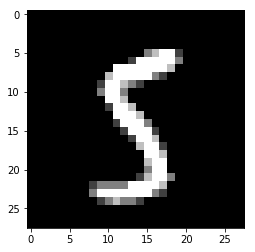

In [ ]:
# Displaying a random image from dataset
import matplotlib.pyplot as plt
%matplotlib inline
batch = mnist.train.next_batch(1)
plotData = batch[0]
plotData = plotData.reshape(28, 28)
plt.gray()
plt.imshow(plotData)
plt.show()

### 2.1 Setting things up
Next, we can set-up the placeholder variables for the training data (and some training parameters):

In [ ]:
# Python optimisation variables
learning_rate = 0.5
epochs = 10
batch_size = 100

# declaring the training data placeholders
# input x - for 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])
# declaring the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

The **x** input layer is **784** nodes corresponding to the **28 x 28 (=784) pixels**, and the **y** output layer is **10 nodes** corresponding to the 10 possible digits.  Again, the size of x is (? x 784), where the ***?*** stands for an as yet unspecified number of samples to be input – this is the function of the placeholder variable.

Let's setup the weight and bias variables for the three layer neural network.  There are always L-1 number of weights/bias tensors, where L is the number of layers.  So in this case, we need to setup two tensors for each:

In [ ]:
# declaring the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([300]), name='b1')
# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([10]), name='b2')

First, we declare some variables for W1 and b1, the weights and bias for the connections between the input and hidden layer.  This neural network will have 300 nodes in the hidden layer, so the size of the weight tensor W1 is [784, 300].  We initialise the values of the weights using a random normal distribution with a mean of zero and a standard deviation of 0.03.  TensorFlow has a replicated version of the numpy random normal function, which allows us to create a matrix of a given size populated with random samples drawn from a given distribution.  Likewise, we create W2 and b2 variables to connect the hidden layer to the output layer of the neural network.

Next, we have to setup node inputs and activation functions of the hidden layer nodes:

In [ ]:
# calculating the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)

In the first line, we execute the standard matrix multiplication of the weights (W1) by the input vector x and we add the bias b1.  The matrix multiplication is executed using the tf.matmul operation.  Next, we finalise the hidden_out operation by applying a rectified linear unit activation function to the matrix multiplication plus bias.  Note that TensorFlow has a rectified linear unit activation already setup for us, tf.nn.relu.

This is to execute the following equations, as detailed in the neural networks tutorial:
![image.png](attachment:image.png)
Now, let’s setup the output layer, y_: 

In [ ]:
# calculating the hidden layer output using softmax activated
# output layer
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

Again we perform the weight multiplication with the output from the hidden layer (hidden_out) and add the bias, b2.  In this case, we are going to use a softmax activation for the output layer – we can use the included TensorFlow softmax function tf.nn.softmax.

We also have to include a cost or loss function for the optimisation / backpropagation to work on. Here we’ll use the cross entropy cost function, represented by:

![image.png](attachment:image.png)

Where y(i)j is the ith training label for output node j, yj_(i) is the ith predicted label for output node j, m is the number of training / batch samples and n is the number .  There are two operations occurring in the above equation.  The first is the summation of the logarithmic products and additions across all the output nodes.  The second is taking a mean of this summation across all the training samples.  We can implement this cross entropy cost function in TensorFlow with the following code:


In [ ]:
y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                        + (1 - y) * tf.log(1 - y_clipped), axis=1))

Explanation: The first line is an operation converting the output y_ to a clipped version, limited between 1e-10 to 0.999999.  This is to make sure that we never get a case were we have a log(0) operation occurring during training – this would return NaN and break the training process.  The second line is the cross entropy calculation.

To perform this calculation, first we use TensorFlow’s tf.reduce_sum function – this function basically takes the sum of a given axis of the tensor you supply.  In this case, the tensor that is supplied is the element-wise cross-entropy calculation for a single node and training sample i.e.:
y(i)jlog(yj_(i))+(1–y(i)j)log(1–yj_(i)).  

Remember that y and y_clipped in the above calculation are (m x 10) tensors – therefore we need to perform the first sum over the second axis.  This is specified using the axis=1 argument, where “1” actually refers to the second axis when we have a zero-based indices system like Python.

After this operation, we have an (m x 1) tensor.  To take the mean of this tensor and complete our cross entropy cost calculation (i.e. execute this part 1m∑mi=1), we use TensorFlow’s tf.reduce_mean function.  This function simply takes the mean of whatever tensor you provide it.  So now we have a cost function that we can use in the training process.

Let’s setup the optimiser in TensorFlow:

In [ ]:
# adding an optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

Here we are just using the gradient descent optimiser provided by TensorFlow.  We initialize it with a learning rate, then specify what we want it to do – i.e. minimise the cross entropy cost operation we created.  This function will then perform the gradient descent (for more details on gradient descent see http://adventuresinmachinelearning.com/neural-networks-tutorial/ and http://adventuresinmachinelearning.com/stochastic-gradient-descent/) and the backpropagation for us.  How easy is that?  TensorFlow has a library of popular neural network training optimisers, see https://www.tensorflow.org/api_guides/python/train.

Finally, let’s setup the variable initialisation operation and an operation to measure the accuracy of our predictions:

In [ ]:
# setup the initialisation operator
init_op = tf.global_variables_initializer()

# defining an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

The correct prediction operation correct_prediction makes use of the TensorFlow tf.equal function which returns True or False depending on whether to arguments supplied to it are equal.  The **tf.argmax** function is the same as the numpy argmax function(https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html), which returns the index of the maximum value in a vector / tensor.  Therefore, the correct_prediction operation returns a tensor of size **(m x 1)** of True and False values designating whether the neural network has correctly predicted the digit.  We will calculate the mean accuracy from this tensor – first we have to cast the type of the correct_prediction operation from a Boolean to a TensorFlow float in order to perform the reduce_mean operation.  Once we’ve done that, we now have an accuracy operation ready to assess the performance of our neural network.

### 3.2 Setting up the training
We now have everything we need to setup the training process of our neural network. 

Stepping through the lines below, the first couple relate to setting up the with statement and running the initialisation operation.  The third line relates to our mini-batch training scheme that we are going to run for this neural network.  If you want to know about mini-batch gradient descent, check out this post.  In the third line, we are calculating the number of batches to run through in each training epoch.  After that, we loop through each training epoch and initialise an avg_cost variable to keep track of the average cross entropy cost for each epoch.  The next line is where we extract a randomised batch of samples, batch_x and batch_y, from the MNIST training dataset.  The TensorFlow provided MNIST dataset has a handy **utility function**, **next_batch** that makes it easy to extract batches of data for training.

The following line is where we run two operations.The sess.run is capable of taking a list of operations to run as its first argument.  In this case, supplying [optimiser, cross_entropy] as the list means that both these operations will be performed.  As such, we get two outputs, which we have assigned to the variables _ and c.  We don’t really care too much about the output from the optimiser operation but we want to know the output from the cross_entropy operation – which we have assigned to the variable c.  Note, we run the optimiser (and cross_entropy) operation on the batch samples.  In the following line, we use c to calculate the average cost for the epoch.

Finally, we print out our progress in the average cost, and after the training is complete, we run the accuracy operation to print out the accuracy of our trained network on the test set.  Running this program produces the following output:

In [ ]:
# start the session
with tf.Session() as sess:
   # initialise the variables
   sess.run(init_op)
   total_batch = int(len(mnist.train.labels) / batch_size)
   for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            _ , c = sess.run([optimiser, cross_entropy], 
                         feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        test_acc = sess.run(accuracy,feed_dict={x: mnist.test.images, y: mnist.test.labels})
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost), "test accuracy: {:.3f}".format(test_acc))
   print("\nTraining complete!")     
   print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Epoch: 1 cost = 0.571 test accuracy: 0.940
Epoch: 2 cost = 0.213 test accuracy: 0.970
Epoch: 3 cost = 0.152 test accuracy: 0.972
Epoch: 4 cost = 0.119 test accuracy: 0.975
Epoch: 5 cost = 0.098 test accuracy: 0.977
Epoch: 6 cost = 0.080 test accuracy: 0.978
Epoch: 7 cost = 0.063 test accuracy: 0.977
Epoch: 8 cost = 0.053 test accuracy: 0.978
Epoch: 9 cost = 0.045 test accuracy: 0.980
Epoch: 10 cost = 0.036 test accuracy: 0.980

Training complete!
0.9801


We got approximately 98% accuracy on the test set, not bad.  We could do a number of things to improve the model, such as regularisation, but we are just interested in exploring TensorFlow
 
 **Summary:**

* Tensorflow is a programming framework used in deep learning
* The two main object classes in tensorflow are Tensors and Operators.
* When you code in tensorflow you have to take the following steps:
    * Create a graph containing Tensors (Variables, Placeholders ...) and Operations (tf.matmul, tf.add, ...)
    * Create a session
    * Initialize the session
    * Run the session to execute the graph
* You can execute the graph multiple times as you've seen in model()
* The backpropagation and optimization is automatically done when running the session on the "optimizer" object.

### Reference

1. TensorFlow Tutorial -**from Kulbear** 
https://github.com/Kulbear/deep-learning-coursera/blob/master/Improving%20Deep%20Neural%20Networks%20Hyperparameter%20tuning%2C%20Regularization%20and%20Optimization/Tensorflow%20Tutorial.ipynb

2. Python TensorFlow Tutorial – Build a Neural Network **from Andy**
http://adventuresinmachinelearning.com/python-tensorflow-tutorial/



